In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [3]:
df.drop(['CustomerId','Surname'],axis='columns',inplace = True)
df.head()

,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
df.isna().value_counts()

id     CreditScore  Geography  Gender  Age    Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
False  False        False      False   False  False   False    False          False      False           False            False     165034
Name: count, dtype: int64

In [5]:
df.shape

(165034, 12)

In [6]:
df.columns

Index(['id', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [7]:
df[pd.to_numeric(df['EstimatedSalary'],errors='coerce').isnull()]

,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [8]:
df['EstimatedSalary'] = pd.to_numeric(df['EstimatedSalary'])
df.dtypes

id                   int64
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

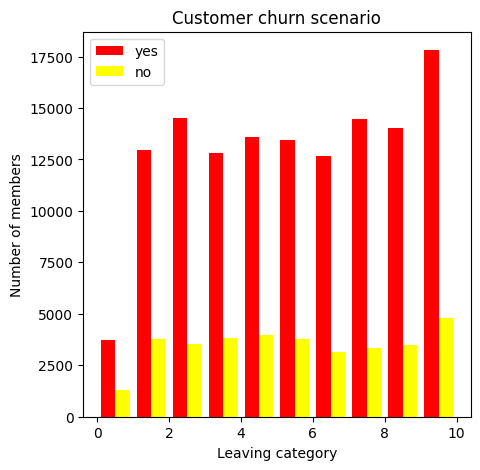

In [9]:
df_exited_no = df[df.Exited==0].Tenure
df_exited_yes = df[df.Exited==1].Tenure

plt.figure(figsize=(5,5))
plt.xlabel('Leaving category')
plt.ylabel('Number of members')
plt.hist([df_exited_no,df_exited_yes],color=['red','yellow'],label=['yes','no'])
plt.legend()
plt.title('Customer churn scenario')
plt.show()
         

In [10]:
def print_unique_cols(df):
  for column in df:
      if df[column].dtypes=='object':
          print(f'{column}:{df[column].unique}')

In [11]:
print_unique_cols(df)

Geography:<bound method Series.unique of 0         France
1         France
2         France
3         France
4          Spain
           ...  
165029     Spain
165030    France
165031    France
165032     Spain
165033    France
Name: Geography, Length: 165034, dtype: object>
Gender:<bound method Series.unique of 0           Male
1           Male
2           Male
3           Male
4           Male
           ...  
165029    Female
165030      Male
165031      Male
165032    Female
165033      Male
Name: Gender, Length: 165034, dtype: object>


In [12]:
for col in df:
    print(col)

id
CreditScore
Geography
Gender
Age
Tenure
Balance
NumOfProducts
HasCrCard
IsActiveMember
EstimatedSalary
Exited


In [13]:
df['Gender'].replace({'Female':0,'Male':1},inplace=True)
df['Gender'].unique()

array([1, 0], dtype=int64)

In [14]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [15]:
df['Geography'].replace({'France':0,'Spain':1,'Germany':2},inplace=True)
df['Geography'].unique()

array([0, 1, 2], dtype=int64)

In [16]:
scale_cols = ['Tenure','Balance','CreditScore','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[scale_cols]=scaler.fit_transform(df[scale_cols])

In [17]:
df.sample(5)

,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
56512,56512,0.608,0,1,34.0,0.7,0.629028,1,1.0,1.0,0.628816,0
97640,97640,0.698,0,1,38.0,0.1,0.490583,2,1.0,0.0,0.347897,0
98797,98797,0.624,0,0,41.0,0.7,0.000000,1,1.0,0.0,0.813820,0
13426,13426,0.992,0,1,36.0,0.9,0.000000,2,1.0,0.0,0.472430,0
20652,20652,0.650,1,1,28.0,0.6,0.000000,2,1.0,0.0,0.737610,0


In [18]:
x = df.drop(['Exited'],axis='columns').astype('float32')

y = df['Exited']

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=4)


In [20]:
x_train.shape

(132027, 11)

In [21]:
x_test.shape

(33007, 11)

In [22]:
len(x_train.columns)

11

In [23]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(33,input_shape=(11,),activation='relu'),
    keras.layers.Dense(66,activation='relu'),
    keras.layers.Dense(66,activation='relu'),
    keras.layers.Dense(66,activation='relu'),
    keras.layers.Dense(66,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

    

In [24]:
model.fit(x_train, y_train, epochs=20)

Epoch 1/20


4126/4126 [==============================] - 18s 4ms/step - loss: 6.5853 - accuracy: 0.7345
Epoch 2/20
4126/4126 [==============================] - 15s 4ms/step - loss: 0.5165 - accuracy: 0.7882
Epoch 3/20
4126/4126 [==============================] - 15s 4ms/step - loss: 0.5316 - accuracy: 0.7878
Epoch 4/20
4126/4126 [==============================] - 15s 4ms/step - loss: 0.5535 - accuracy: 0.7880
Epoch 5/20
4126/4126 [==============================] - 15s 4ms/step - loss: 0.5281 - accuracy: 0.7879
Epoch 6/20
4126/4126 [==============================] - 15s 4ms/step - loss: 0.5166 - accuracy: 0.7882
Epoch 7/20
4126/4126 [==============================] - 16s 4ms/step - loss: 0.5281 - accuracy: 0.7882
Epoch 8/20
4126/4126 [==============================] - 16s 4ms/step - loss: 0.5165 - accuracy: 0.7882
Epoch 9/20
4126/4126 [==============================] - 15s 4ms/step - loss: 0.5166 - accuracy: 0.7882
Epoch 10/20
4126/4126 [==============================] - 14s 3ms/step -

In [25]:
model.evaluate(x_test,y_test)

1032/1032 [==============================] - 3s 3ms/step - loss: 0.5153 - accuracy: 0.7893


[0.5152844190597534, 0.7892568111419678]

In [27]:
yp=model.predict(x_test)
yp

1032/1032 [==============================] - 2s 2ms/step


array([[0.22159319],
       [0.22159319],
       [0.22159319],
       ...,
       [0.22159319],
       [0.22159319],
       [0.22159319]], dtype=float32)

In [33]:
y_pred=[]
for element in yp :
    if element>0.5:
        y_pred.append(1)
    else :
         y_pred.append(0)
         
        
    


In [34]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [35]:
y_test[:10]

142294    1
162256    1
143889    0
155120    1
35930     0
60959     0
2696      0
16470     1
145094    1
104734    1
Name: Exited, dtype: int64

In [38]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     26051
           1       0.00      0.00      0.00      6956

    accuracy                           0.79     33007
   macro avg       0.39      0.50      0.44     33007
weighted avg       0.62      0.79      0.70     33007



C:\python 3.10.9\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\python 3.10.9\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\python 3.10.9\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


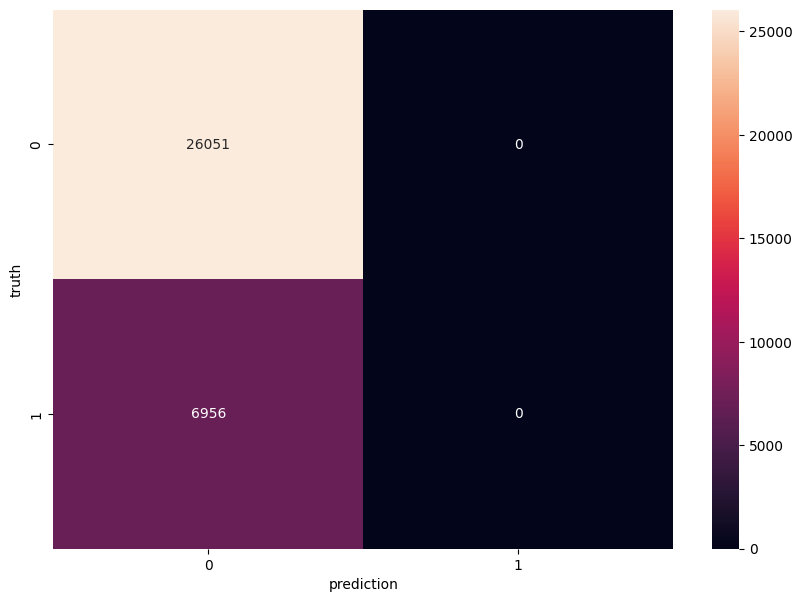

In [42]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('prediction')
plt.ylabel('truth')
plt.show()